In [42]:
from nbodykit.lab import LinearMesh, cosmology, FFTPower
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as scpimg
import nbodykit
import h5py

%matplotlib inline

In [43]:
def generate_divergence(Nmesh=128, BoxSize=600, seed=42, klim=0.1):
    def my_Plin(k):
        l = Plin(k)
        l[k>klim] = 0
        return l
    cosmo = cosmology.Planck15
    Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='NoWiggleEisensteinHu')
    mesh = LinearMesh(my_Plin, Nmesh=Nmesh, BoxSize=BoxSize, seed=seed)
    density = mesh.paint(mode='real')
    
    f = cosmo.scale_independent_growth_rate(0.0)
    divergence = - 100 * cosmo.h * f * (density[...] - 1)
    
    output_filename = 'mock_divergence_mesh_{}_box_{}_slim_{}.h5'.format(Nmesh, BoxSize, int(1/klim))
    h5f = h5py.File(output_filename, 'w')
    h5f.create_dataset('divergence', data=divergence)
    h5f.close()
    print("Finished writing to {}".format(output_filename))

In [44]:
klim_list = [1/20.0,1.0/14.0,1.0/10.0, 1.0/6.0, 1.0/2.0]
for klim in klim_list:
    generate_divergence(Nmesh=128, BoxSize=600, klim=klim)

Finished writing to mock_divergence_mesh_128_box_600_slim_20.h5
Finished writing to mock_divergence_mesh_128_box_600_slim_14.h5
Finished writing to mock_divergence_mesh_128_box_600_slim_10.h5
Finished writing to mock_divergence_mesh_128_box_600_slim_6.h5
Finished writing to mock_divergence_mesh_128_box_600_slim_2.h5


In [45]:
klim_list = [1/20.0,1.0/14.0,1.0/10.0, 1.0/6.0, 1.0/2.0]
for klim in klim_list:
    generate_divergence(Nmesh=256, BoxSize=320, klim=klim)

Finished writing to mock_divergence_mesh_256_box_320_slim_20.h5
Finished writing to mock_divergence_mesh_256_box_320_slim_14.h5
Finished writing to mock_divergence_mesh_256_box_320_slim_10.h5
Finished writing to mock_divergence_mesh_256_box_320_slim_6.h5
Finished writing to mock_divergence_mesh_256_box_320_slim_2.h5


0 0.05
1 0.07142857142857142
2 0.1
3 0.16666666666666666
4 0.5


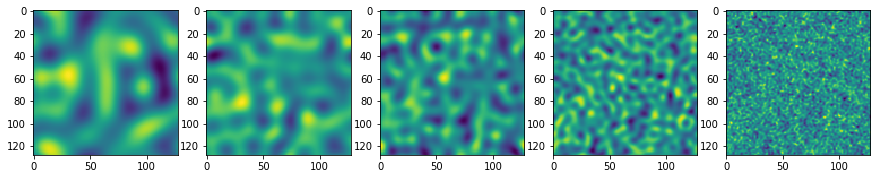

In [48]:
plt.figure(figsize=(15,5))
for i, klim in enumerate(klim_list):
    print(i, klim)
    f = h5py.File('mock_divergence_mesh_128_box_600_slim_{}.h5'.format(int(1/klim)), 'r')
    divergence_field = f['divergence'][...]
    f.close()
    
    plt.subplot(1,5,i+1)
    plt.imshow(divergence_field[:,:,10])

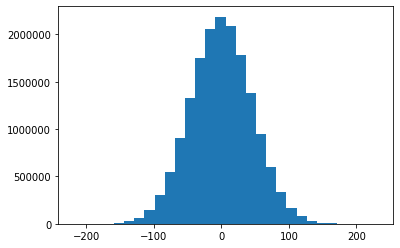

In [49]:
f = h5py.File('mock_divergence_mesh_256_box_320_slim_{}.h5'.format(2, 'r'))
divergence_field = f['divergence'][...]
f.close()
_ = plt.hist(divergence_field.flatten(), bins=30)